In [34]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import StratifiedShuffleSplit
from matplotlib import pyplot as plt

In [3]:
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [12]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [26]:
data = iris.data
target = iris.target
strat_sample = StratifiedShuffleSplit(n_splits=1, test_size=.2,random_state=93)

In [27]:
for train_index, test_index in strat_sample.split(data,target):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = target[train_index], target[test_index]

In [28]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [29]:
kmeans.cluster_centers_

array([[5.9125    , 2.75      , 4.38333333, 1.41041667],
       [4.985     , 3.37      , 1.4575    , 0.2425    ],
       [6.878125  , 3.04375   , 5.778125  , 2.059375  ]])

In [64]:
predictions = kmeans.predict(X_test)

In [65]:
predictions

array([0, 1, 1, 2, 0, 2, 1, 0, 0, 1, 1, 1, 2, 0, 0, 0, 2, 2, 0, 1, 1, 0,
       1, 0, 2, 0, 0, 0, 0, 1], dtype=int32)

In [72]:
iris.target_names
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

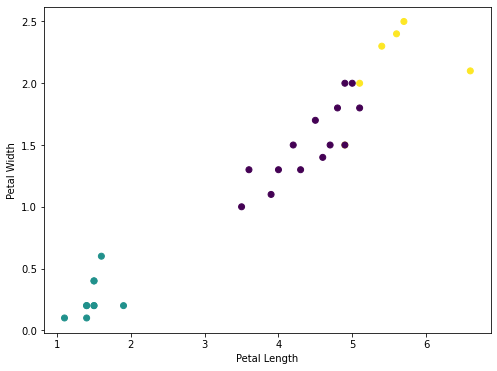

In [74]:
plt.figure(figsize = (8,6))
plt.scatter(X_test[:,2],X_test[:,3],c = predictions)
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.show()

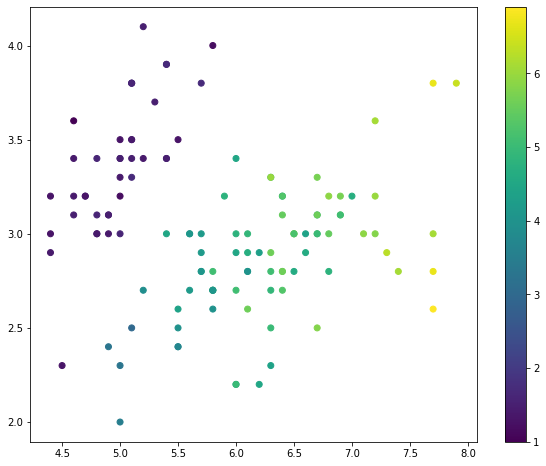

In [59]:
plt.figure(figsize=(10,8))
plt.scatter(X_train[:,0],X_train[:,1],c = X_train[:,2])#,s = X_train[:,3] * 30)
plt.colorbar()
plt.show()